# Import Packages for EDA

We chose the following packages to conduct our EDA.

In [2]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mn
import os
import yellowbrick 

from pandas.plotting import scatter_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Connect to AWS Server

Use username and password to connect to server.

In [3]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [4]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
df_missing_values = pd_sql.read_sql(f"select * from public.\"analysisDataset\" ", con=conn)
#code to be able to view all the columns in pandas dataframe
pd.set_option('display.max_columns', 50)

#check to see the correct table was imported
df.head()  

,level_0,index,id_student,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,tma_cma_assmt_score,total_weight,is_reenrolled,final_exam_score
0,0,0,3733,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,1,6516,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,790.0,389.0,715.0,641.0,2791.0,63.5,100.0,0.0,0.0
2,2,2,8462,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,442.0,123.0,0.0,0.0,646.0,34.9,40.0,0.0,0.0
3,3,3,8462,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,10.0,0.0,0.0,0.0,10.0,43.0,50.0,1.0,0.0
4,4,4,11391,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,431.0,99.0,85.0,221.0,934.0,82.4,100.0,0.0,0.0


In [5]:
df.describe()

,level_0,index,id_student,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,tma_cma_assmt_score,total_weight,is_reenrolled,final_exam_score
count,32593.000000,32593.000000,3.259300e+04,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32548.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,31482.000000,32593.000000,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000,32593.000000,25793.000000
mean,16296.000000,16296.000000,7.066877e+05,0.656644,256.010125,0.383150,0.584911,0.163225,0.472034,-69.411300,0.097076,0.451569,0.302672,5.054337,1.739331,4.211549,79.758691,79.200520,528.206568,278.671229,332.652115,304.142597,1522.873028,47.692154,63.005602,0.016108,12.605164
std,9408.932998,9408.932998,5.491673e+05,0.474836,13.179078,0.486162,0.492745,0.479758,0.499225,49.260522,0.296066,0.497657,0.473628,3.597376,0.749598,2.815849,41.071900,139.738365,602.251810,397.554155,477.088998,478.721574,1778.435282,32.383844,39.774680,0.167329,27.370270
min,0.000000,0.000000,3.733000e+03,0.000000,234.000000,0.000000,0.000000,0.000000,0.000000,-322.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8148.000000,8148.000000,5.085730e+05,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,60.000000,4.000000,156.000000,47.000000,18.000000,0.000000,392.000000,14.400000,23.000000,0.000000,0.000000
50%,16296.000000,16296.000000,5.903100e+05,1.000000,262.000000,0.000000,1.000000,0.000000,0.000000,-57.000000,0.000000,0.000000,0.000000,5.000000,2.000000,4.000000,60.000000,31.000000,339.000000,142.000000,160.000000,122.000000,907.000000,54.750000,80.000000,0.000000,0.000000
75%,24444.000000,24444.000000,6.444530e+05,1.000000,268.000000,1.000000,1.000000,0.000000,1.000000,-29.000000,0.000000,1.000000,1.000000,8.000000,2.000000,7.000000,120.000000,94.000000,683.000000,342.000000,447.000000,398.000000,1991.000000,77.250000,100.000000,0.000000,0.000000
max,32592.000000,32592.000000,2.716795e+06,1.000000,269.000000,1.000000,1.000000,6.000000,1.000000,167.000000,1.000000,1.000000,2.000000,12.000000,4.000000,9.000000,655.000000,3731.000000,9616.000000,7592.000000,6535.000000,12541.000000,24139.000000,100.000000,100.000000,12.000000,100.000000


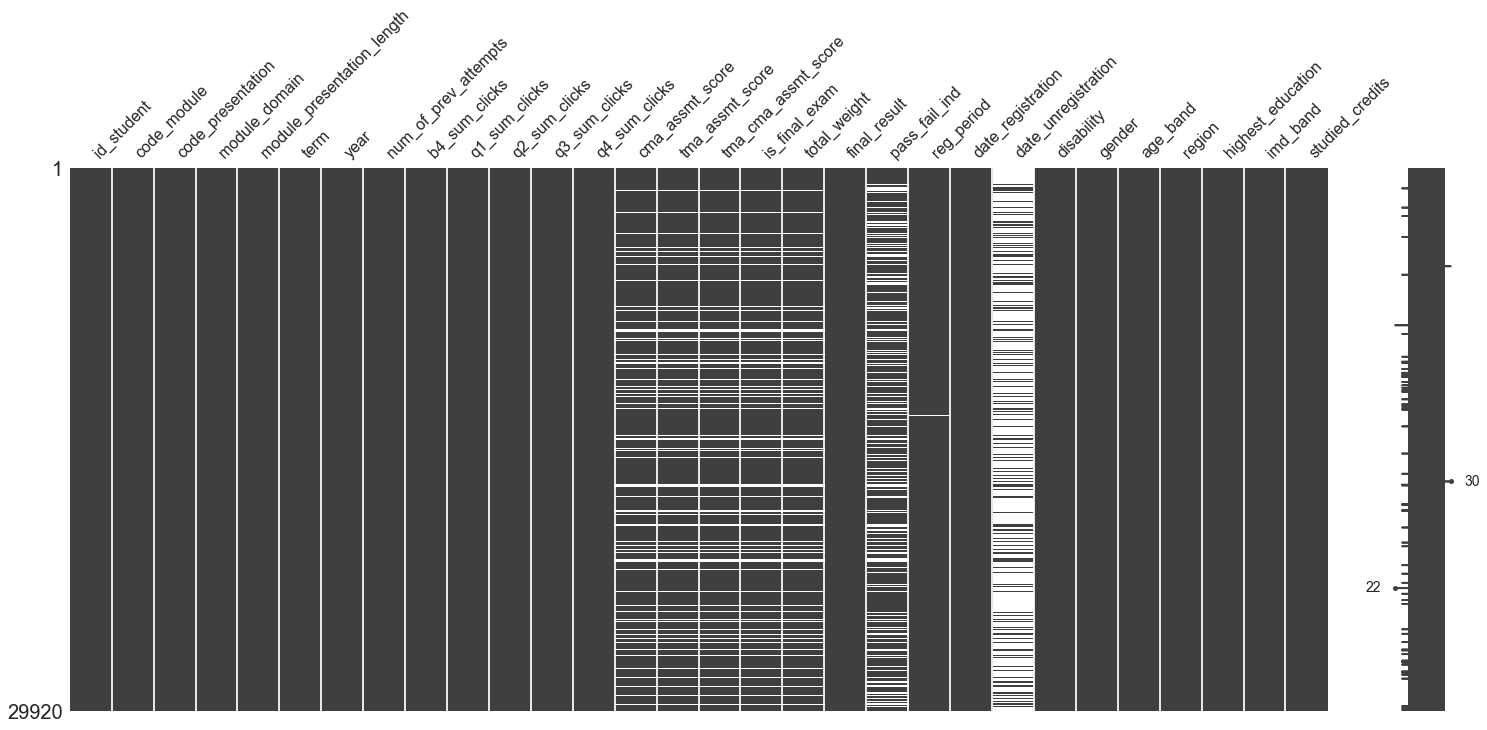

In [10]:
#examine missing values in original dataset called analysisDataset
mn.matrix(df_missing_values)

In [6]:
df_missing_values["date_unregistration"].count() 
#FOLLOW UP: check to see how many date_unregistraions are based on withdraw in final_results

7461

# Exploratory Data Analysis

In [5]:
#investigate data types of all the files
df.dtypes

level_0                         int64
index                           int64
id_student                      int64
module_domain                   int64
module_presentation_length      int64
term                            int64
year                            int64
num_of_prev_attempts            int64
final_result                    int64
date_registration             float64
disability                      int64
gender                          int64
age_band                        int64
region                          int64
highest_education               int64
imd_band                      float64
studied_credits                 int64
b4_sum_clicks                 float64
q1_sum_clicks                 float64
q2_sum_clicks                 float64
q3_sum_clicks                 float64
q4_sum_clicks                 float64
allclicks                     float64
cma_assmt_score               float64
tma_assmt_score               float64
tma_cma_assmt_score           float64
final_exam  

0     3446
1     3340
2     3216
3     3092
4     2906
5     2582
6     2436
7     2365
8     2111
9     2086
10    2006
11    1823
12    1184
Name: region, dtype: int64


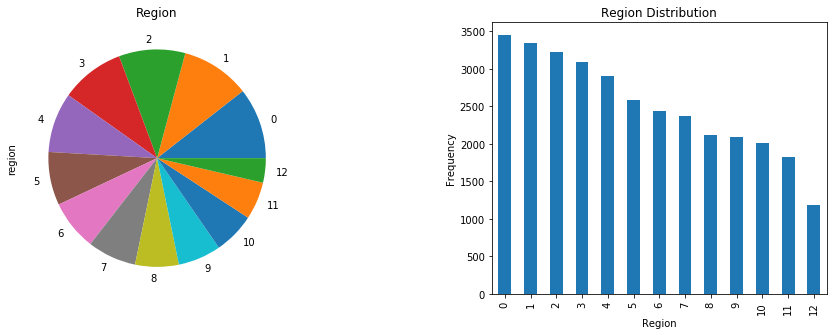

In [6]:
#data distribution of regions
presentation_counts = df['region'].value_counts()
print (presentation_counts)

#created pie chart and histogram chart. Compare both visuals to see which is better at displaying the data.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
presentation_counts.plot(kind='pie')
plt.title('Region')

plt.subplot(1,2,2)
presentation_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Region Distribution')

# add more space between the two plots
plt.subplots_adjust(wspace=0.5)

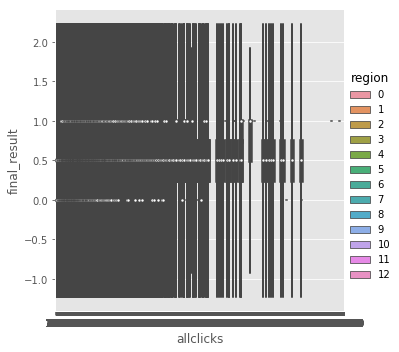

In [56]:
#g = sns.catplot(x="allclicks", y="final_result", hue="region",
                data=df, kind="violin")

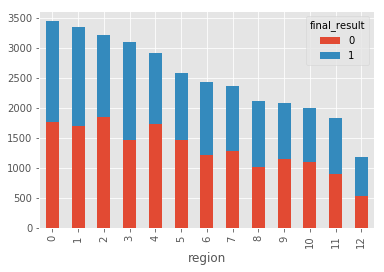

In [54]:
#check pass and fail ratio for students in diffent regions
df.groupby(['region','final_result']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


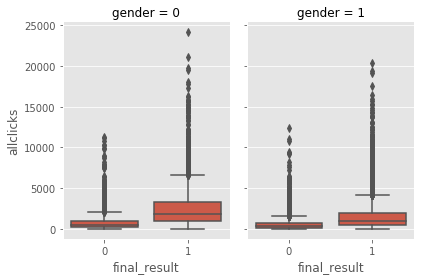

In [59]:
g = sns.FacetGrid(df, col='gender', height=4, aspect=.75)
g = g.map(sns.boxplot, 'final_result', 'allclicks')

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


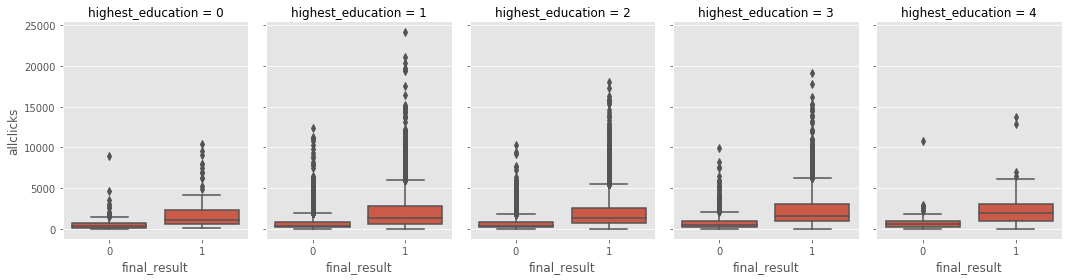

In [65]:
g = sns.FacetGrid(df, col='highest_education', height=4, aspect=.75)
g = g.map(sns.boxplot, 'final_result', 'allclicks')

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


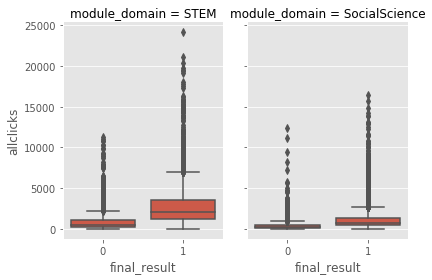

In [66]:
g = sns.FacetGrid(df, col='module_domain', height=4, aspect=.75)
g = g.map(sns.boxplot, 'final_result', 'allclicks')

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


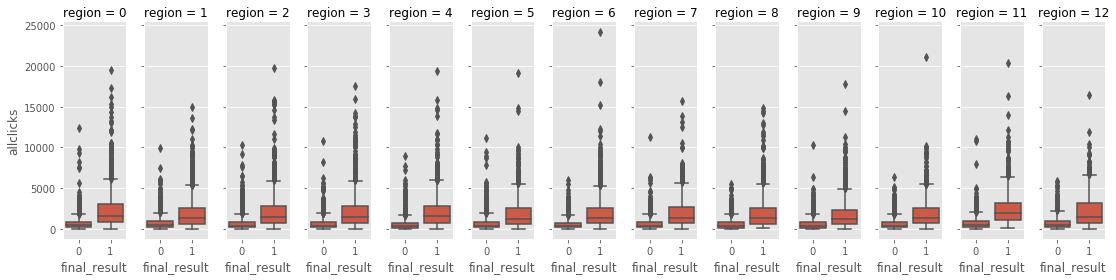

In [64]:
g = sns.FacetGrid(df, col='region', height=4, aspect=.3)
g = g.map(sns.boxplot, 'final_result', 'allclicks')

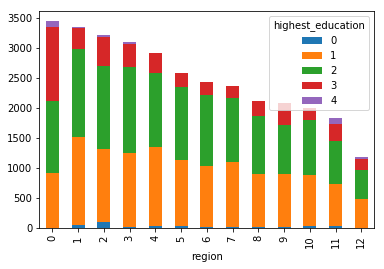

In [8]:
#check out education levels by each region
#df['region', 'highest_education'].counts()
df.groupby(['region','highest_education']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [9]:
#check out counts for gender by each region
df.groupby(['region','gender'])['gender'].count()

region  gender
0       0         2039
        1         1407
1       0         1717
        1         1623
2       0         1703
        1         1513
3       0         1746
        1         1346
4       0         1685
        1         1221
5       0         1400
        1         1182
6       0         1291
        1         1145
7       0         1228
        1         1137
8       0         1105
        1         1006
9       0         1043
        1         1043
10      0         1058
        1          948
11      0         1204
        1          619
12      0          656
        1          528
Name: gender, dtype: int64

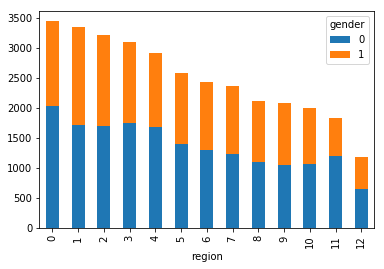

In [10]:
#check out gender by each region
#df['region', 'highest_education'].counts()
df.groupby(['region','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

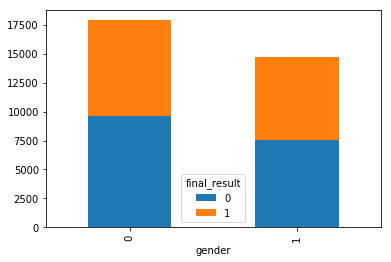

In [11]:
#investigate pass rates based on gender
df.groupby(['gender', 'final_result']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

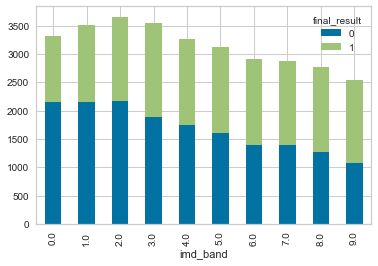

In [7]:
#investigate pass rates based on poverty indicator index
df.groupby(['imd_band', 'final_result']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [8]:
#Pulling all Column Names/Feature Labels
df.columns

Index(['level_0', 'index', 'id_student', 'module_domain',
       'module_presentation_length', 'term', 'year', 'num_of_prev_attempts',
       'final_result', 'date_registration', 'disability', 'gender', 'age_band',
       'region', 'highest_education', 'imd_band', 'studied_credits',
       'b4_sum_clicks', 'q1_sum_clicks', 'q2_sum_clicks', 'q3_sum_clicks',
       'q4_sum_clicks', 'allclicks', 'tma_cma_assmt_score', 'total_weight',
       'is_reenrolled', 'final_exam_score'],
      dtype='object')

In [9]:
#investigating Student VLE interactions. Summary Statistics of sum click data.
df[[ 'b4_sum_clicks','q1_sum_clicks', 'q2_sum_clicks', 'q3_sum_clicks', 'q4_sum_clicks', 'allclicks']].describe()

,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks
count,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000
mean,79.200520,528.206568,278.671229,332.652115,304.142597,1522.873028
std,139.738365,602.251810,397.554155,477.088998,478.721574,1778.435282
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,156.000000,47.000000,18.000000,0.000000,392.000000
50%,31.000000,339.000000,142.000000,160.000000,122.000000,907.000000
75%,94.000000,683.000000,342.000000,447.000000,398.000000,1991.000000
max,3731.000000,9616.000000,7592.000000,6535.000000,12541.000000,24139.000000


In [10]:
#creating a function to pull min and max values of allclicks column and view associated features unique to a student
def min_max_values(col):
    ''' the function takes the colum name as the argument
        and returns the top & bottom observation in that dataframe
    '''
    top = df[col].idxmax()
    top_obs = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bot_obs = pd.DataFrame(df.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis=1)
    
    return min_max_obs

In [11]:
min_max_values('allclicks')

,496,4431
level_0,492.0,4431.00
index,492.0,4431.00
id_student,80868.0,382339.00
module_domain,1.0,1.00
module_presentation_length,269.0,240.00
term,0.0,1.00
year,1.0,0.00
num_of_prev_attempts,0.0,1.00
final_result,1.0,0.00
date_registration,-60.0,-51.00


//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


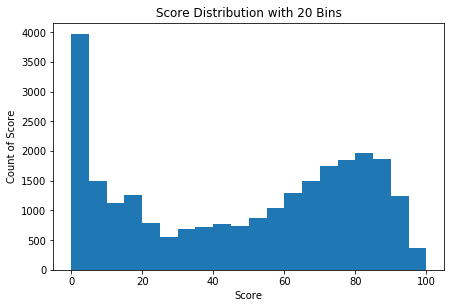

In [12]:
#create bins for score distribution

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['tma_cma_assmt_score'], bins=20, range=(df['tma_cma_assmt_score'].min(),df['tma_cma_assmt_score'].max()))
plt.title('Score Distribution with 20 Bins')
plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.show()

In [13]:
# extract everything from 'table_name' into a dataframe
df2 = pd_sql.read_sql(f"select * from public.\"studentAssessmentFULLSTG\" ", con=conn).reset_index()
df2.head()  

,index,id_assessment,id_student,date_submitted,is_banked,scoretxt,score,code_module,code_presentation,assessment_type,final_sub_date,weight
0,0,1759,6516,51,0,48,48.0,AAA,2014J,TMA,54.0,20.0
1,1,1760,6516,116,0,63,63.0,AAA,2014J,TMA,117.0,20.0
2,2,1758,6516,17,0,60,60.0,AAA,2014J,TMA,19.0,10.0
3,3,1761,6516,164,0,61,61.0,AAA,2014J,TMA,166.0,20.0
4,4,1762,6516,210,0,77,77.0,AAA,2014J,TMA,215.0,30.0


In [14]:
#count the number of unique student ids
df['id_student'].count()

32593

In [15]:
df.head()

,level_0,index,id_student,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
0,0,0,3733,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,1,6516,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,790.0,389.0,715.0,641.0,2791.0,0.0,63.5,63.5,0.0,100.0,0.0,0.0
2,2,2,8462,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,442.0,123.0,0.0,0.0,646.0,0.0,34.9,34.9,0.0,40.0,0.0,0.0
3,3,3,8462,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,10.0,0.0,0.0,0.0,10.0,0.0,43.0,43.0,0.0,50.0,1.0,0.0
4,4,4,11391,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,431.0,99.0,85.0,221.0,934.0,0.0,82.4,82.4,0.0,100.0,0.0,0.0


In [16]:
#count the number of semesters
df.groupby(['year', 'term', 'module_domain'])['id_student'].count()

year  term  module_domain
0     0     0                3572
            1                5273
      1     0                1767
            1                2917
1     0     0                3406
            1                7854
      1     0                2446
            1                5358
Name: id_student, dtype: int64

In [17]:
#count the number of classes
df2['code_module'].nunique()

7

In [18]:
#count of null values in chart
df.isnull().sum()

level_0                          0
index                            0
id_student                       0
module_domain                    0
module_presentation_length       0
term                             0
year                             0
num_of_prev_attempts             0
final_result                     0
date_registration               45
disability                       0
gender                           0
age_band                         0
region                           0
highest_education                0
imd_band                      1111
studied_credits                  0
b4_sum_clicks                 6800
q1_sum_clicks                 6800
q2_sum_clicks                 6800
q3_sum_clicks                 6800
q4_sum_clicks                 6800
allclicks                     6800
cma_assmt_score               6800
tma_assmt_score               6800
tma_cma_assmt_score           6800
final_exam                    6800
total_weight                  6800
is_reenrolled       

In [22]:
#distribution of gender based on course genre
df.groupby(['module_domain','gender'])['gender'].count()

module_domain  gender
0              0          1843
               1          9348
1              0         16032
               1          5370
Name: gender, dtype: int64

In [23]:
df.groupby(['gender', 'module_domain'])['module_domain'].count()

gender  module_domain
0       0                 1843
        1                16032
1       0                 9348
        1                 5370
Name: module_domain, dtype: int64

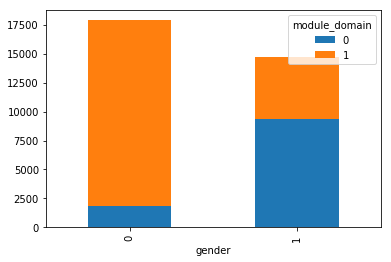

In [24]:
df.groupby(['gender', 'module_domain']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

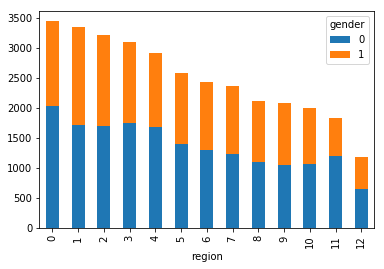

In [28]:
df.groupby(['region', 'gender']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

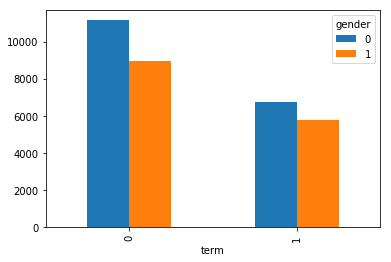

In [30]:
#semester by gender, the first year is more gender blanaced than the second year
df.groupby(['term','gender']).size().unstack().plot(kind='bar')
plt.show()

In [32]:
#number count of the graph above
df.groupby(['year','term','gender'])['gender'].count()

year  term  gender
0     0     0         4645
            1         4200
      1     0         2295
            1         2389
1     0     0         6499
            1         4761
      1     0         4436
            1         3368
Name: gender, dtype: int64

In [34]:
df['term'].value_counts()

0    20105
1    12488
Name: term, dtype: int64

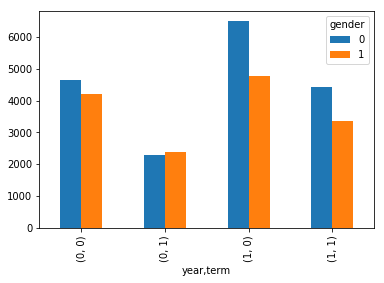

In [36]:
#class by gender
df.groupby(['year','term', 'gender']).size().unstack().plot(kind='bar')
plt.show()

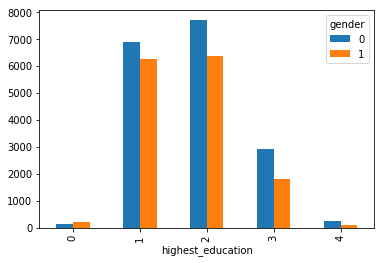

In [37]:
#grouping education by gender
df.groupby(['highest_education', 'gender']).size().unstack().plot(kind='bar')
plt.show()

# Scatter Matrix for All the Features in Our Finalized Dataset

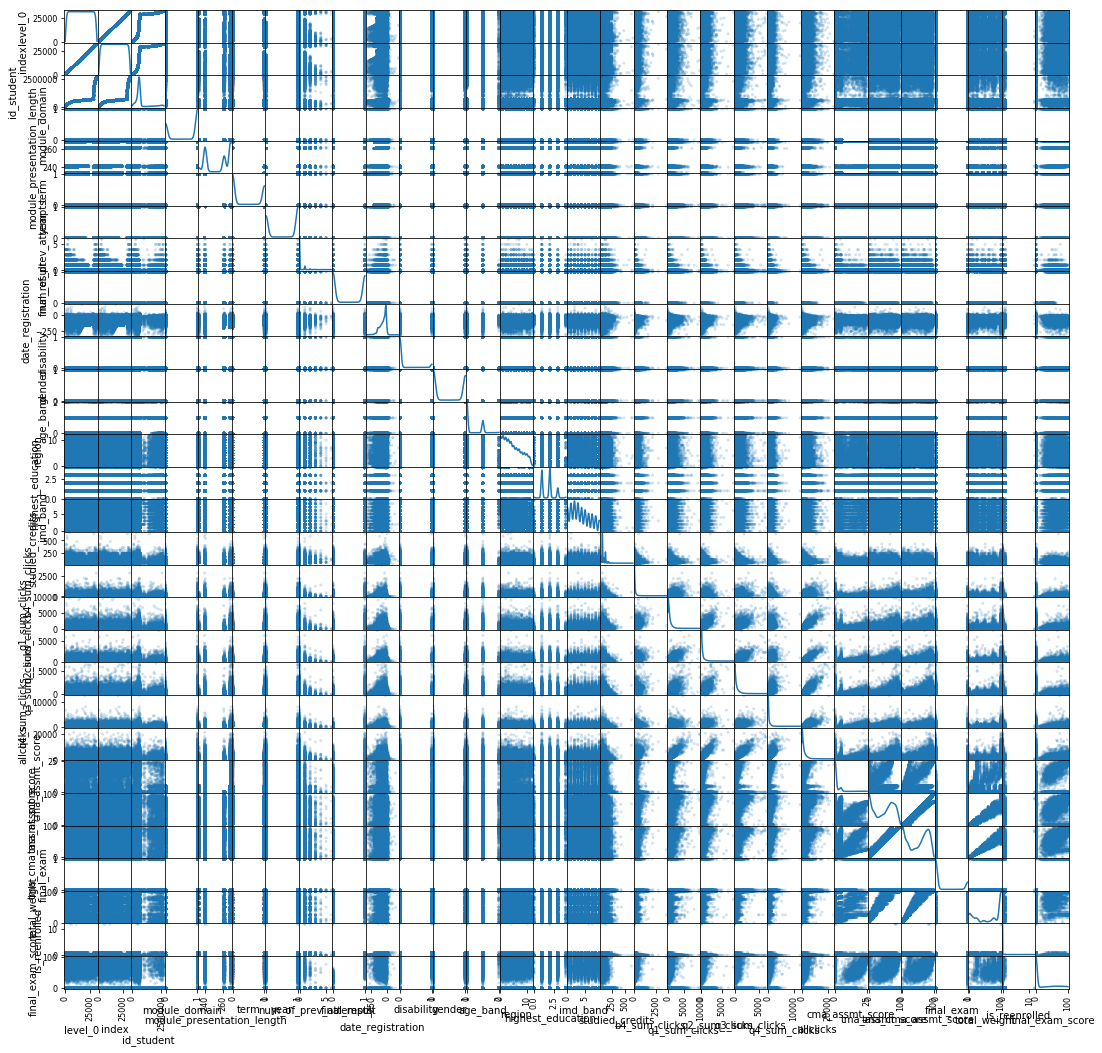

In [38]:
X = df[df.columns.values.tolist()].sample(frac=0.20, replace=False, random_state=1)
#20% of the data for the scatter matrix
scatter_matrix(df, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [ ]:
sns.set_palette("colorblind")

g = sns.pairplot(df, hue="final_result")
plt.show()

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


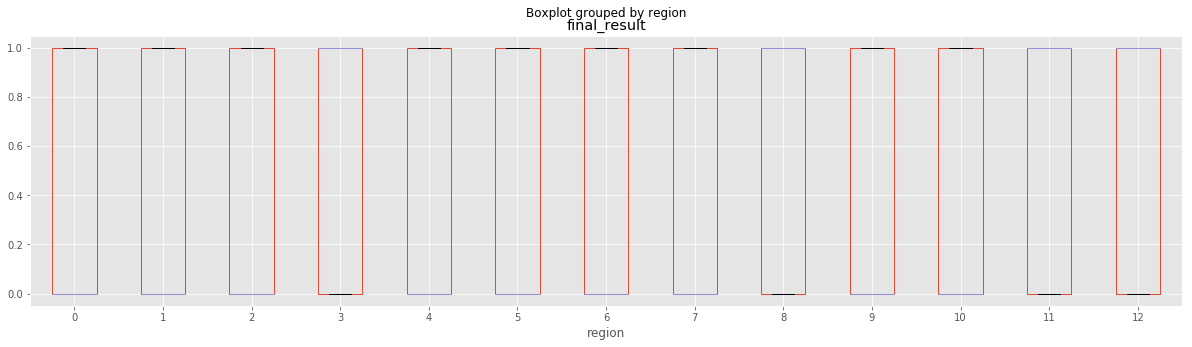

In [21]:
plt.style.use('ggplot')
df.boxplot("final_result","region", figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124a754e0>,
      dtype=object)

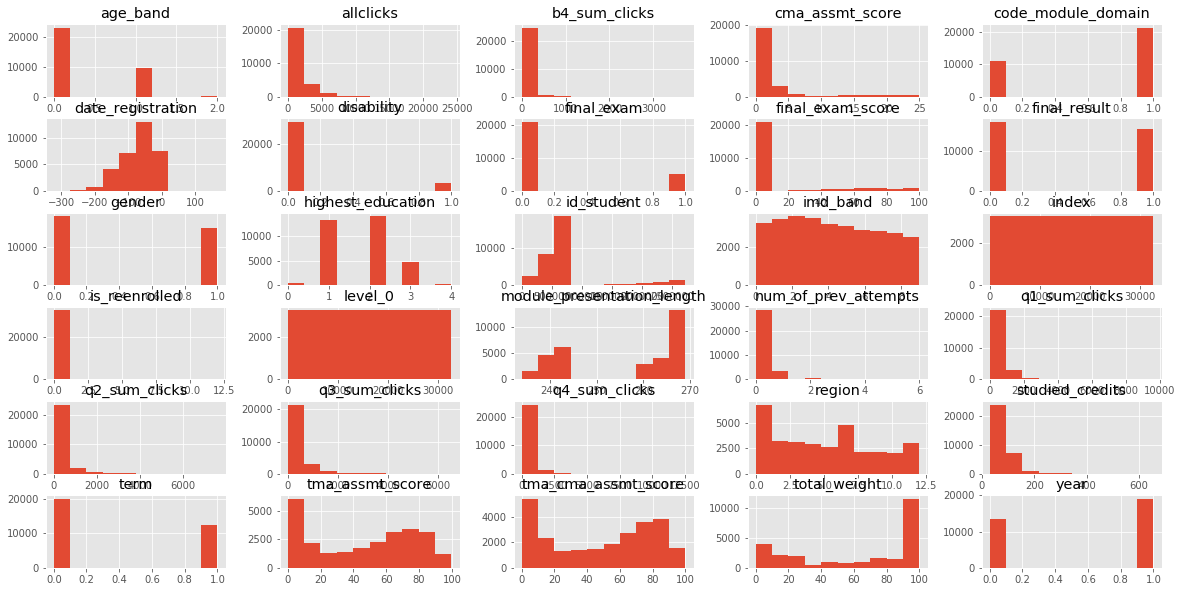

In [22]:
df.hist(figsize=(20,10)) # Histogram for all features

In [14]:
df.head()

,level_0,index,id_student,code_module,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score,code_module_domain
0,0,0,3733,DDD,2013J,STEM,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1
1,1,1,6516,AAA,2014J,SocialScience,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,790.0,389.0,715.0,641.0,2791.0,0.0,63.5,63.5,0.0,100.0,0.0,0.0,0
2,2,2,8462,DDD,2013J,STEM,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,442.0,123.0,0.0,0.0,646.0,0.0,34.9,34.9,0.0,40.0,0.0,0.0,1
3,3,3,8462,DDD,2014J,STEM,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,10.0,0.0,0.0,0.0,10.0,0.0,43.0,43.0,0.0,50.0,1.0,0.0,1
4,4,4,11391,AAA,2013J,SocialScience,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,431.0,99.0,85.0,221.0,934.0,0.0,82.4,82.4,0.0,100.0,0.0,0.0,0


In [ ]:
df_test = df[['id_student', 'tma_cma_assmt_score', 'code_module', 'code_presentation', 'module_domain', 'final_result']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123200c88>,
      dtype=object)

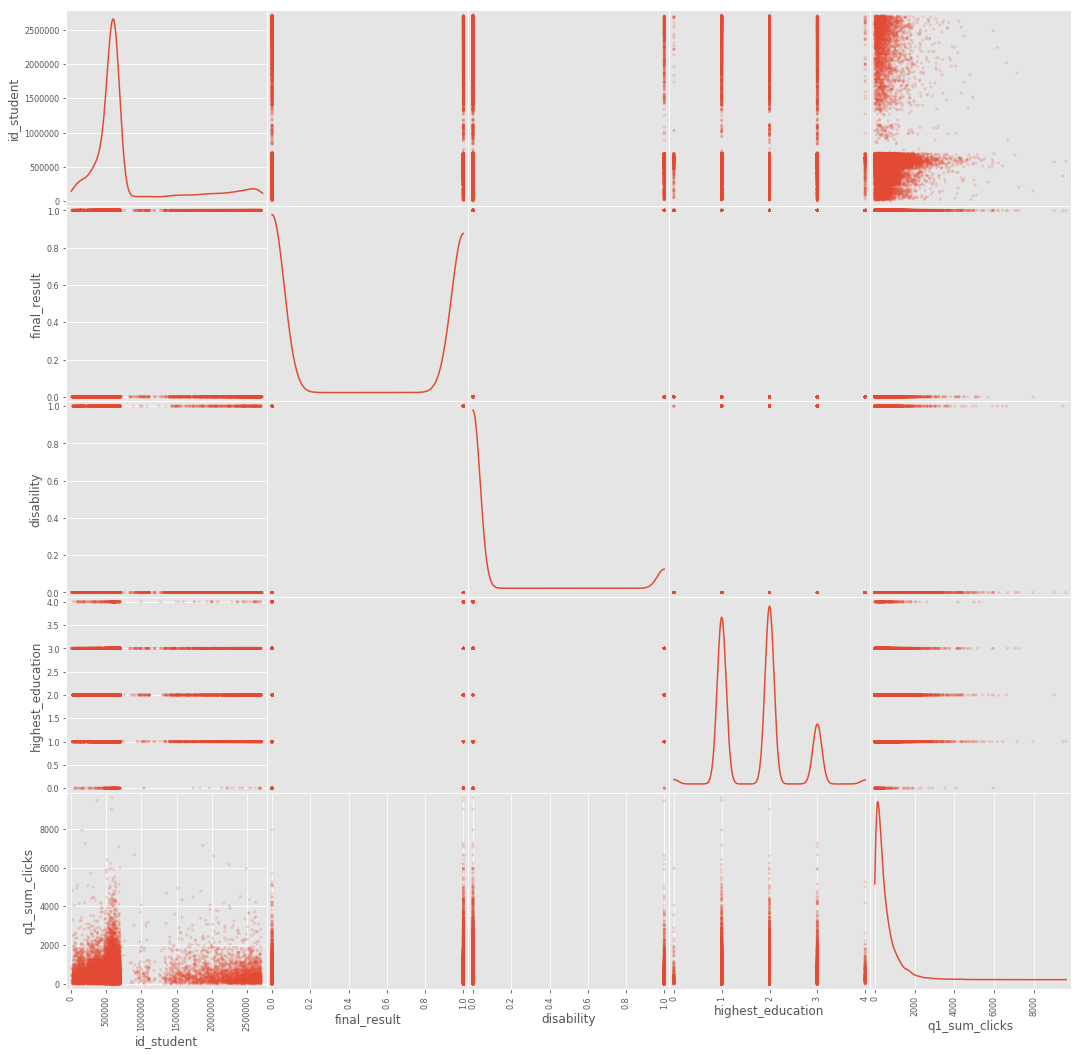

In [23]:
areas = df[['id_student','final_result','module_domain','disability', 'highest_education','q1_sum_clicks']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

In [ ]:
df_test.head()

In [ ]:
#sns.set_palette("colorblind")

#g = sns.pairplot(df, hue="final_result")

#plt.show()

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


KeyboardInterrupt: 

In [ ]:
scatter_matrix(df_test, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [ ]:
ax = df.boxplot("studied_credits","region", figsize=(20,5))

In [ ]:
disconnectDB()